In [7]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [9]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.3594, grad_fn=<NllLossBackward>)
tensor(0.0019, grad_fn=<NllLossBackward>)
tensor(0.0814, grad_fn=<NllLossBackward>)


In [13]:
correct = 0
total = 0

# with torch.no_grad():
for data in testset:
    X, y = data
    output = net(X.view(-1,784))
    print(output)
    for idx, i in enumerate(output):
        #print(torch.argmax(i), y[idx])
        if torch.argmax(i) == y[idx]:
            correct += 1
        total += 1

print("Accuracy: ", round(correct/total, 3))

e+01,
         -1.7630e+01, -3.1933e+01, -6.1391e-05, -1.6466e+01, -1.3667e+01]],
       grad_fn=<LogSoftmaxBackward>)
tensor([[-1.4036e+01, -1.7979e+01, -1.8353e+01, -1.4367e+01, -2.2451e+01,
         -2.0490e-04, -8.5256e+00, -2.3622e+01, -1.2173e+01, -1.7224e+01],
        [-2.1168e+01, -1.6208e+01, -1.8454e+01, -2.3879e+01, -2.9802e-06,
         -1.8725e+01, -1.9299e+01, -1.7252e+01, -1.9536e+01, -1.2747e+01],
        [-2.7187e+01, -1.3576e+01, -1.5697e+01, -3.1113e-05, -2.6811e+01,
         -1.0458e+01, -3.3937e+01, -1.8501e+01, -1.3884e+01, -1.6565e+01],
        [-1.5679e+01, -1.7143e+01, -1.3480e+01, -2.0690e+01, -5.0068e-06,
         -1.6421e+01, -1.4624e+01, -1.4890e+01, -1.7577e+01, -1.2944e+01],
        [-8.7788e+00, -4.7955e+00, -2.2674e-01, -5.2931e+00, -1.6250e+01,
         -7.8849e+00, -1.1858e+01, -6.5141e+00, -1.6737e+00, -1.1007e+01],
        [-1.1764e+01, -9.7106e+00, -1.0759e+01, -7.6667e+00, -1.1508e+01,
         -7.2733e+00, -8.9162e+00, -1.3776e+01, -2.8342e-03, -

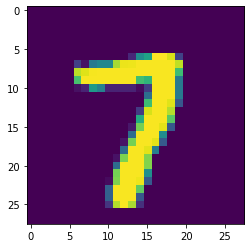

In [11]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [12]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)
